In [17]:
from platform import python_version

print(python_version())

3.11.13


In [22]:
! pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-install-bkrm4gfs/qc-grader_3c2aa332bd684378af23e3f8d18d088e
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-install-bkrm4gfs/qc-grader_3c2aa332bd684378af23e3f8d18d088e
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 897f4448b14d18b4d0a430f57f11c2dcb6200c20
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of ibm-cloud-sdk-core to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.1 

In [23]:
import qiskit
import qc_grader

print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.0
Grader version: 0.22.9


In [24]:
your_api_key = "your API key here"
your_crn = "your CRN here"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="qgss-2025",
    overwrite=True
)

In [25]:
service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'token',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/40b27075d7c34b02bc4479d6db856fc8:01702384-c52d-4f72-a651-75ca6450c112::',
  'verify': True,
  'private_endpoint': False}}

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import (
    grade_lab1_ex1_1,
    grade_lab1_ex1_2,
    grade_lab1_ex1_3,
    grade_lab1_ex1_4,
    grade_lab1_ex2,
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6
)

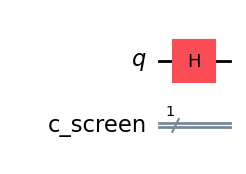

In [33]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit = QuantumCircuit(qr, cr)
# your code here

double_slit.h(qr[0])

# end of your code
double_slit.draw('mpl')


In [34]:
# Submit your answer using the following code
grade_lab1_ex1_1(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


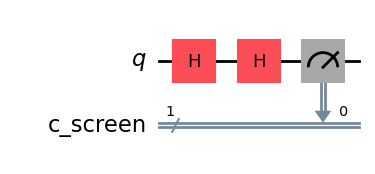

In [35]:
# your code here

double_slit.h(qr[0])
double_slit.measure(qr[0], cr[0])

# end of your code
double_slit.draw('mpl')


In [36]:
# Submit your answer using the following code
grade_lab1_ex1_2(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


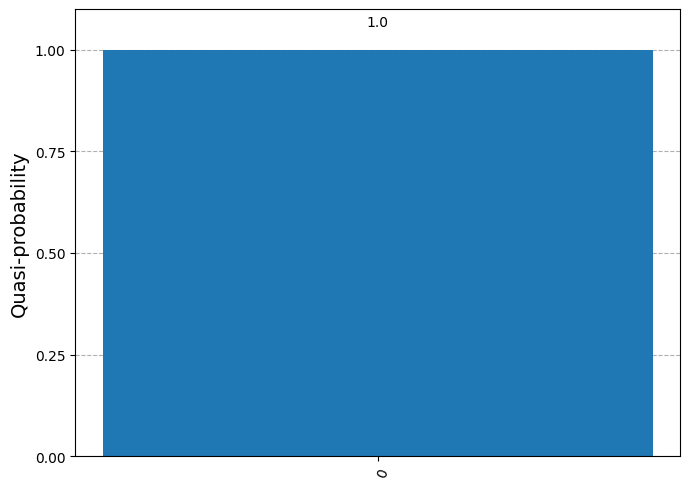

In [37]:
# use simulator
backend = AerSimulator()

# make quantum circuit compatible to the backend
pm = generate_preset_pass_manager(backend = backend, optimization_level=3)
qc_isa = pm.run(double_slit)

# run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots = 1000).result()[0].data.c_screen.get_counts()

plot_distribution(counts)

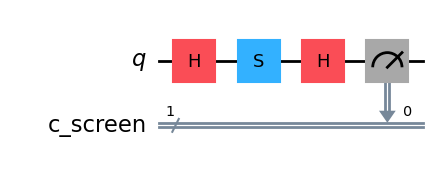

In [42]:
qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_with_difference = QuantumCircuit(qr, cr)
double_slit_with_difference.h(0)

#your code here

double_slit_with_difference.s(0)


#end of your code

double_slit_with_difference.h(0)
double_slit_with_difference.measure(qr, cr)
double_slit_with_difference.draw('mpl')


In [43]:
# Submit your answer using the following code
grade_lab1_ex1_3(double_slit_with_difference)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


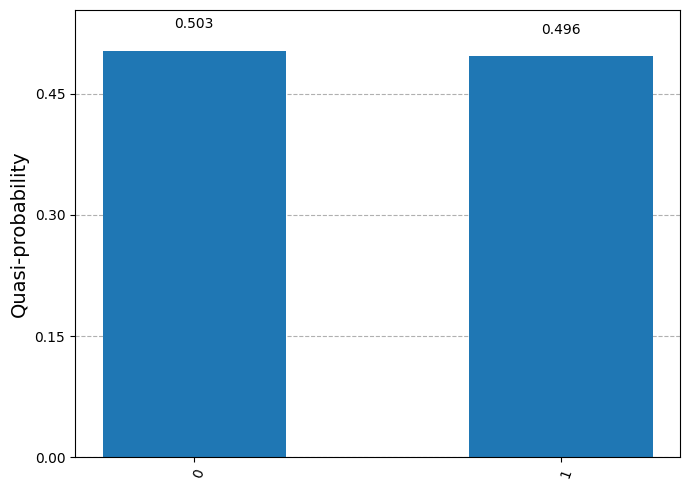

In [44]:
qc_isa = pm.run(double_slit_with_difference)

#run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots=10000).result()[0].data.c_screen.get_counts()
plot_distribution(counts)

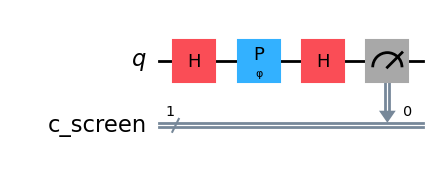

In [45]:
φ = Parameter('φ')

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_fringe = QuantumCircuit(qr, cr)

#your code here


double_slit_fringe.h(qr[0])
double_slit_fringe.p(φ, qr[0])
double_slit_fringe.h(qr[0])
double_slit_fringe.measure(qr[0], cr[0])

#end of your code
double_slit_fringe.draw('mpl')

In [46]:
# Submit your answer using the following code
grade_lab1_ex1_4(double_slit_fringe)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


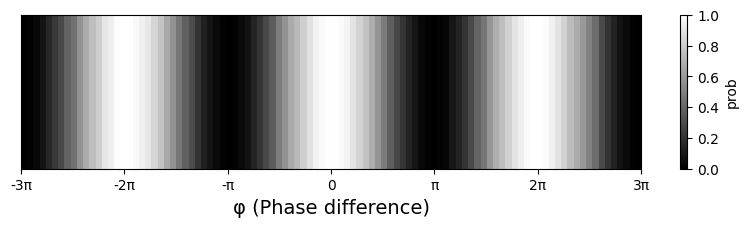

In [47]:
φ_lst = np.linspace(-3*np.pi, 3*np.pi, 100)
qc_isa = pm.run(double_slit_fringe)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

#plot heat map
φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1])

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])
plt.show()

In [48]:
def schrodingers_cat_experiment_theta(theta):

    qc = QuantumCircuit(1)

    #your code start here

    qc.rx(theta, 0)

    #end of your code

    qc.measure_all()

    backend = AerSimulator()
    pm = generate_preset_pass_manager( backend = backend, optimization_level=3)
    qc_isa = pm.run(qc)

    # Circuit compile and run, shot = 1
    sampler = Sampler(mode=backend)
    counts = sampler.run([qc_isa], shots = 1).result()[0].data.meas.get_counts()

    measured_state = list(counts.keys())[0] if counts else '0'

    if measured_state == '0':
        cat_happy = True
    else:
        cat_happy = False

    return cat_happy, qc


In [49]:
# Submit your answer using the following code
grade_lab1_ex2(schrodingers_cat_experiment_theta)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


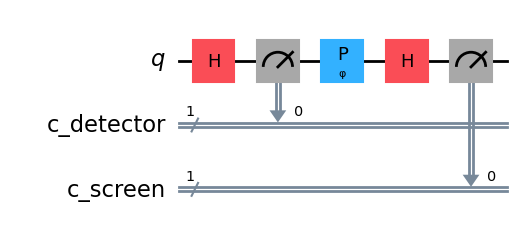

In [52]:
qr = QuantumRegister(1, name='q')
cr1 = ClassicalRegister(1, name='c_detector')
cr2 = ClassicalRegister(1, name='c_screen')
double_slit_with_detector = QuantumCircuit(qr, cr1, cr2)

φ = Parameter('φ')

#your code here
double_slit_with_detector.h(qr[0])
double_slit_with_detector.measure(qr[0], cr1[0])

double_slit_with_detector.p(φ, qr[0])
double_slit_with_detector.h(qr[0])
double_slit_with_detector.measure(qr[0], cr2[0])
#end of your code

double_slit_with_detector.draw('mpl')

In [53]:
grade_lab1_ex3(double_slit_with_detector)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


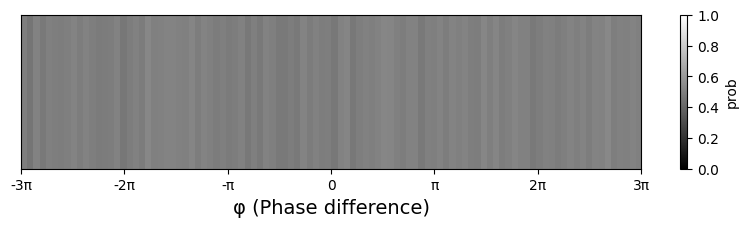

In [54]:
φ_lst = np.linspace(-3 * np.pi, 3 * np.pi, 100)
qc_isa = pm.run(double_slit_with_detector)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1], vmin=0, vmax=1)

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3 * np.pi, -2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi, 3 * np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])
plt.show()

In [57]:
from qiskit.circuit.library import RYGate
from math import pi

def create_chsh_circuit(x, y):
    """Builds Qiskit circuit for Alice & Bob's quantum strategy."""
    qc = QuantumCircuit(2, 2, name=f'CHSH_{x}{y}') # 2 qubits, 2 classical bits

    # ---- TODO : Task 1 ---
    # Create Bell state |Φ+> = (|00> + |11>)/sqrt(2)
    qc.h(0)
    qc.cx(0, 1)
    # --- End of TODO ---
    qc.barrier()

    # Step 2a: Alice's measurement basis (X if x=1, Z if x=0)
    if x == 1:
        qc.h(0) # H for X-basis measurement

    ##  --- TODO: Task 2 ----
    # Bob's measurement basis
    if y == 0:
        qc.ry(-pi/4, 1)
    elif y == 1:
        qc.ry(pi/4, 1)

    # --- End of TODO ---
    qc.barrier()

    # Step 3: Measure
    qc.measure([0, 1], [0, 1]) # q0 to c0 (Alice), q1 to c1 (Bob)

    return qc


In [58]:
grade_lab1_ex4(create_chsh_circuit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):


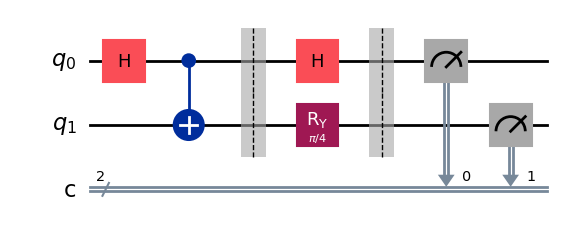

In [59]:
circuits = []
input_pairs = []
for x_in in [0, 1]:
    for y_in in [0, 1]:
        input_pairs.append((x_in, y_in))
        circuits.append(create_chsh_circuit(x_in, y_in))

print("Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):")
if len(circuits) == 4:
    display(circuits[3].draw('mpl'))
else:
    print("Circuits not generated. Run previous cell after completing Exercises 1 & 2.")

Preparing circuits for the simulator...

--- Simulation Results (Counts) ---
Inputs (x=0, y=0):
  Outcomes (ba): {'00': 452, '01': 79, '10': 77, '11': 416}
Inputs (x=0, y=1):
  Outcomes (ba): {'00': 459, '01': 60, '10': 73, '11': 432}
Inputs (x=1, y=0):
  Outcomes (ba): {'00': 417, '01': 82, '10': 75, '11': 450}
Inputs (x=1, y=1):
  Outcomes (ba): {'00': 79, '01': 429, '10': 427, '11': 89}

Plotting results...


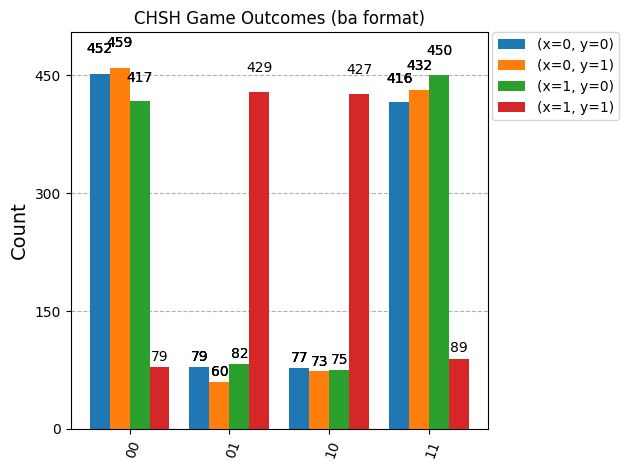

In [60]:
SHOTS = 1024

print("Preparing circuits for the simulator...")
isa_qc_chsh = pm.run(circuits)

sampler_chsh = Sampler(mode=backend)
job_chsh = sampler_chsh.run(isa_qc_chsh, shots=SHOTS)
results_chsh = job_chsh.result()

# SamplerV2: results_chsh[i].data.c.get_counts() where 'c' is the default name of classical register
counts_list = [results_chsh[i].data.c.get_counts() for i in range(len(circuits))]

print("\n--- Simulation Results (Counts) ---")
for i, (x, y) in enumerate(input_pairs):
    print(f"Inputs (x={x}, y={y}):")
    sorted_counts = dict(sorted(counts_list[i].items()))
    print(f"  Outcomes (ba): {sorted_counts}")

print("\nPlotting results...")
display(plot_histogram(counts_list,
                       legend=[f'(x={x}, y={y})' for x, y in input_pairs],
                       title='CHSH Game Outcomes (ba format)'))

In [61]:
import numpy as np

# Assume you have:
# - input_pairs = [(0,0), (0,1), (1,0), (1,1)]
# - counts_list = [counts_00, counts_01, counts_10, counts_11]
# - SHOTS = number of shots per circuit (e.g., 1024)

win_probabilities = {}
print("--- Calculating Win Probabilities ---")

for i, (x, y) in enumerate(input_pairs):
    counts = counts_list[i]

    # ---- TODO : Task 1 ---
    # Target (a XOR b) value for winning
    target_xor_result = x & y
    # --- End of TODO ---

    wins_for_this_case = 0

    # ---- TODO : Task 2 ---
    # Calculate the total number of shots that satisfy the winning condition determined above.
    for outcome, count in counts.items():
        # outcome is a string like 'ba' -> a = last bit, b = second last bit
        a = int(outcome[-1])  # Alice's bit
        b = int(outcome[-2])  # Bob's bit
        if a ^ b == target_xor_result:
            wins_for_this_case += count
    # --- End of TODO ---

    prob = wins_for_this_case / SHOTS if SHOTS > 0 else 0
    win_probabilities[(x, y)] = prob
    print(f"Inputs (x={x}, y={y}): Target (a XOR b) = {target_xor_result}. Win Probability = {prob:.4f}")

avg_win_prob = sum(win_probabilities.values()) / 4.0
P_win_quantum_theory = np.cos(np.pi / 8)**2  # ~0.8536
P_win_classical_limit = 0.75

print("\n--- Overall Performance ---")
print(f"Experimental Average Win Probability: {avg_win_prob:.4f}")
print(f"Theoretical Quantum Win Probability: {P_win_quantum_theory:.4f}")
print(f"Classical Limit Win Probability:     {P_win_classical_limit:.4f}")

if avg_win_prob > P_win_classical_limit + 0.01:  # Allow for small simulation variance
    print(f"\nSuccess! Your result ({avg_win_prob:.4f}) clearly beats the classical 75% limit!")
    print(f"It's likely close to the theoretical quantum prediction of {P_win_quantum_theory:.4f}.")
elif avg_win_prob > P_win_classical_limit - 0.02:
    print(f"\nClose, but no cigar? Your result ({avg_win_prob:.4f}) is around the classical limit ({P_win_classical_limit:.4f}).")
    print("Check your solutions for Exercises 1-4 carefully, especially the win counting logic in Ex 5.")
else:
    print(f"\nHmm, the result ({avg_win_prob:.4f}) is unexpectedly low, even below the classical limit.")
    print("There might be an error in Exercises 1-4. Please review your circuit and analysis code.")


--- Calculating Win Probabilities ---
Inputs (x=0, y=0): Target (a XOR b) = 0. Win Probability = 0.8477
Inputs (x=0, y=1): Target (a XOR b) = 0. Win Probability = 0.8701
Inputs (x=1, y=0): Target (a XOR b) = 0. Win Probability = 0.8467
Inputs (x=1, y=1): Target (a XOR b) = 1. Win Probability = 0.8359

--- Overall Performance ---
Experimental Average Win Probability: 0.8501
Theoretical Quantum Win Probability: 0.8536
Classical Limit Win Probability:     0.7500

Success! Your result (0.8501) clearly beats the classical 75% limit!
It's likely close to the theoretical quantum prediction of 0.8536.


In [62]:
grade_lab1_ex5(counts_list, avg_win_prob)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


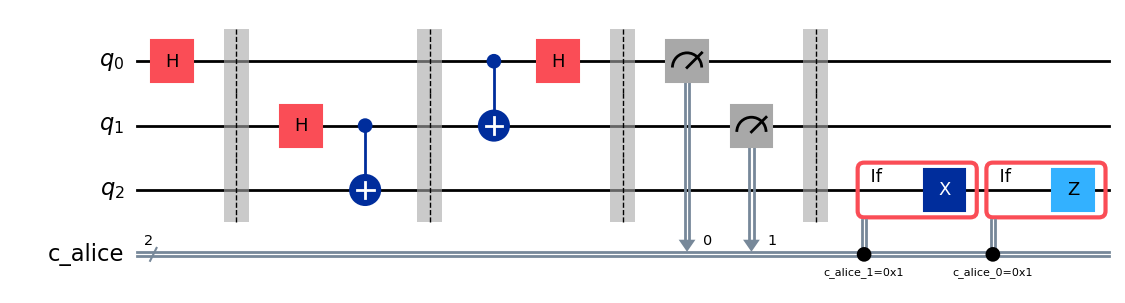

In [75]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit


qr_tele = QuantumRegister(3, name='q')
cr_alice_tele = ClassicalRegister(2, name='c_alice')

teleport_qc = QuantumCircuit(qr_tele, cr_alice_tele, name='Teleportation')

teleport_qc.h(qr_tele[0])
teleport_qc.barrier()

teleport_qc.h(qr_tele[1])
teleport_qc.cx(qr_tele[1], qr_tele[2])
teleport_qc.barrier()

teleport_qc.cx(qr_tele[0], qr_tele[1])
teleport_qc.h(qr_tele[0])
teleport_qc.barrier()

teleport_qc.measure(qr_tele[0], cr_alice_tele[0])
teleport_qc.measure(qr_tele[1], cr_alice_tele[1])
teleport_qc.barrier()

with teleport_qc.if_test((cr_alice_tele[1], 1)):
    teleport_qc.x(qr_tele[2])

with teleport_qc.if_test((cr_alice_tele[0], 1)):
    teleport_qc.z(qr_tele[2])

teleport_qc.draw('mpl')


In [76]:
# Submit your answer using the following code
grade_lab1_ex6(teleport_qc)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [77]:
%matplotlib inline

# Use Statevector Simulator
print("Using statevector simulator...")
sv_simulator = AerSimulator(method='statevector')
teleport_qc_sv = teleport_qc.copy()
teleport_qc_sv.save_statevector()

print("Running statevector simulation...")
job_sv = sv_simulator.run(teleport_qc_sv)
result_sv = job_sv.result()

if result_sv.success:
    print("Simulation successful.")
    final_statevector = result_sv.get_statevector()
    print("Statevector retrieved successfully.")
    print("\nVisualizing final qubit states (q2 should match initial q0 state |+>):")
    display("TODO")

else:
    print(f"Statevector simulation failed! Status: {result_sv.status}")

Using statevector simulator...
Running statevector simulation...
Simulation successful.
Statevector retrieved successfully.

Visualizing final qubit states (q2 should match initial q0 state |+>):


'TODO'

In [78]:
#Check your submission status with the code belowf
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1097 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 102 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab
